<a href="https://colab.research.google.com/github/feknall/machinelearning-playground/blob/main/Gras_Winter2022_Segmentation_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.patches as patches
import re
import random 
import pickle
import cv2
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [ ]:
dataset_path = '/content/drive/MyDrive/ai-gras-2/dataset'

In [ ]:
train_csv = pd.read_csv(f'{dataset_path}/train.csv')
train_csv.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
train_csv.describe()

,ClassId
count,7095.000000
mean,2.825229
std,0.789279
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4.000000


In [ ]:
train_csv.shape

(7095, 3)

In [ ]:
image_id = []
label = []
train_folder_path = f'{dataset_path}/train_images'
for i in os.listdir(train_folder_path):
    for j in range(1,5):
        image_id.append(i)
        label.append(j)

x = {'ImageId': image_id, 'ClassId': label}
train_img = pd.DataFrame(x)
train_img.head(10)

,ImageId,ClassId
0,ea64f7fc8.jpg,1
1,ea64f7fc8.jpg,2
2,ea64f7fc8.jpg,3
3,ea64f7fc8.jpg,4
4,ebfe6e61d.jpg,1
5,ebfe6e61d.jpg,2
6,ebfe6e61d.jpg,3
7,ebfe6e61d.jpg,4
8,ea675dd1e.jpg,1
9,ea675dd1e.jpg,2


In [ ]:
limit = 10
image_size = set()
train_folder_path = f'{dataset_path}/train_images'
for i in os.listdir(train_folder_path)[:limit]:
  image_size.add(cv2.imread(train_folder_path + '/' + i).shape)
unique_image = list(image_size)
for x in unique_image:
  print(x)

(256, 1600, 3)


In [ ]:
df = pd.merge(train_img, train_csv, how='outer', on=['ImageId','ClassId'])
df.fillna('',inplace=True)
df.head()

,ImageId,ClassId,EncodedPixels
0,ea64f7fc8.jpg,1,
1,ea64f7fc8.jpg,2,
2,ea64f7fc8.jpg,3,
3,ea64f7fc8.jpg,4,
4,ebfe6e61d.jpg,1,


In [ ]:
train = pd.pivot_table(df, values='EncodedPixels', index='ImageId', columns='ClassId', aggfunc=np.sum).astype(str)
train = train.reset_index()
train.columns = ['image_id','rle_1','rle_2','rle_3','rle_4'] 
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


In [ ]:
train.describe()

,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,0.530395,1.472788,0.071372,0.019653,0.409771,0.063733,0.564529
std,0.499095,1.495828,0.257455,0.138811,0.491811,0.244287,0.560757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
defect = []
stratify = []
for i in range(len(train)):
  if (train['rle_1'][i] != '' or train['rle_2'][i] != '' or train['rle_3'][i] != '' or train['rle_4'][i] != ''):
    defect.append(1)
  else:
    defect.append(0)
  
  if train['rle_1'][i] != '':
    stratify.append(1)
  elif train['rle_2'][i] != '':
    stratify.append(2)
  elif train['rle_3'][i] != '':
    stratify.append(3)
  elif train['rle_4'][i] != '':
    stratify.append(4)
  else:
    stratify.append(0)
train['defect'] = defect
train['stratify'] = stratify

In [ ]:
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1
1,00031f466.jpg,,,,,0,0
2,000418bfc.jpg,,,,,0,0
3,000789191.jpg,,,,,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3


In [ ]:
defect_1, defect_2, defect_3, defect_4 = [], [], [], []
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1.append(1)
  else:
    defect_1.append(0)
  if train['rle_2'][i] != '':
    defect_2.append(1)
  else:
    defect_2.append(0)
  if train['rle_3'][i] != '':
    defect_3.append(1)
  else:
    defect_3.append(0)
  if train['rle_4'][i] != '':
    defect_4.append(1)
  else:
    defect_4.append(0)
train['defect_1'] = defect_1
train['defect_2'] = defect_2
train['defect_3'] = defect_3
train['defect_4'] = defect_4
train['total_defects'] = train['defect_1'] + train['defect_2'] + train['defect_3'] + train['defect_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [ ]:
with open(f'{dataset_path}/data.pkl','wb') as f:
     pickle.dump(train,f)

In [ ]:
test_image = [i for i in os.listdir(f'{dataset_path}/test_images')]

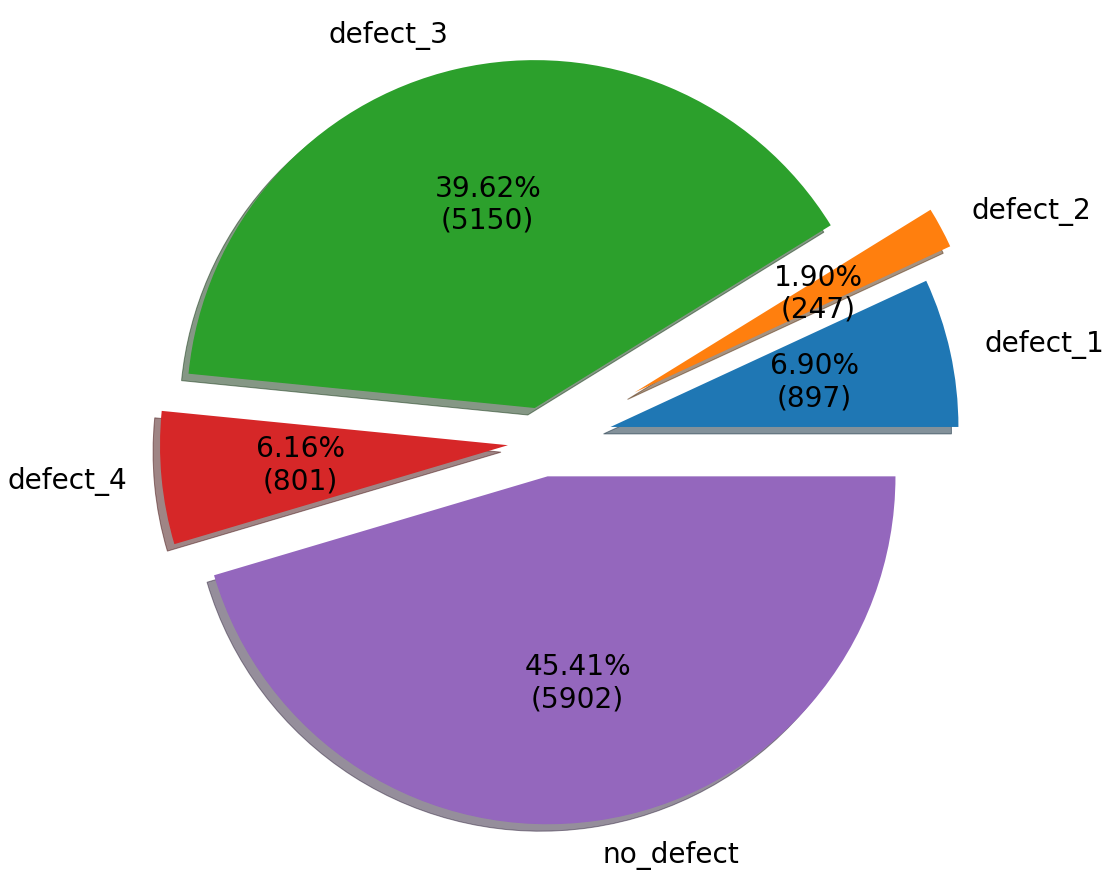

In [ ]:
defect_1, defect_2, defect_3, defect_4, no_defect = 0, 0, 0, 0, 0


def func(v, p):
    a = p * sum(v) / 100
    return "{:.2f}%\n({:.0f})".format(p, a)


for i in range(len(train)):
    if train['rle_1'][i] != '':
        defect_1 += 1
    if train['rle_2'][i] != '':
        defect_2 += 1
    if train['rle_3'][i] != '':
        defect_3 += 1
    if train['rle_4'][i] != '':
        defect_4 += 1
    if train['defect'][i] == 0:
        no_defect += 1
labels = ['defect_1', 'defect_2', 'defect_3', 'defect_4', 'no_defect']
sizes = [defect_1, defect_2, defect_3, defect_4, no_defect]
explode = (0.2, 0.3, 0.1, 0.1, 0.1)
fig, ax = plt.subplots(figsize=(32, 16))
ax.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 28}, autopct=lambda p: func(sizes, p), shadow=True)
# fig.suptitle('Defect Distribution', fontsize=25, fontweight='bold')
# fig.set_facecolor("tan")
plt.show()


In [ ]:
def patch1(bar, ax):
    for p in bar.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate('{}'.format(height), (x + width / 2, y + height * 1.02), ha='center', fontsize=14)

In [ ]:
counts_sorted = train['total_defects'].value_counts().sort_index()
print(counts_sorted)
print(type(counts_sorted))

0    5902
1    6239
2     425
3       2
Name: total_defects, dtype: int64
<class 'pandas.core.series.Series'>


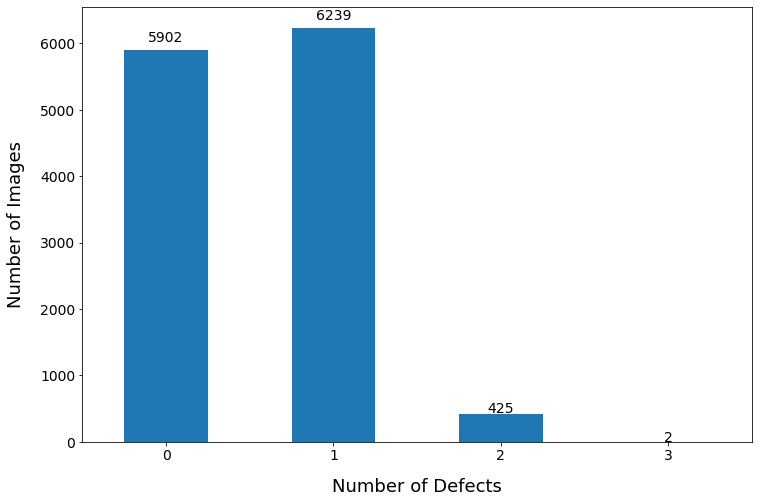

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
a = counts_sorted.plot(kind='bar')
patch1(a, ax)
ax.set_xlabel("Number of Defects", fontsize=18, labelpad=15)
ax.set_ylabel("Number of Images", fontsize=18, labelpad=15)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
# fig.suptitle('No. of Labels per Image', fontsize=25, fontweight='bold')
# ax.set_facecolor("tan")
# fig.set_facecolor("tan")
plt.show()


In [ ]:
def rle_to_mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle)) | (rle == '') | (rle == '-1'):
        return np.zeros((256, 1600), dtype=np.uint8)

    height = 256
    width = 1600
    mask = np.zeros(width * height, dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2] - 1
    lengths = array[1::2]
    for index, start in enumerate(starts):
        mask[int(start):int(start + lengths[index])] = 1

    return mask.reshape((height, width), order='F')


In [ ]:
def plot_mask(rle_defect, k):
    x = rle_defect.columns[2]
    train_folder_path = f'{dataset_path}/train_images/'
    # Create figure and axes
    fig, ax = plt.subplots(4, 2, figsize=(28, 18))
    # fig.suptitle('Defect Type:' + str(k), fontsize=40, fontweight='bold')
    for i in range(4):
        image_id = rle_defect['image_id'][i]
        rle = rle_defect[x][i]
        im = Image.open(train_folder_path + str(image_id))
        ax[i, 0].imshow(im)
        ax[i, 0].set_title(image_id)
        mask = rle_to_mask(rle)
        ax[i, 1].imshow(mask)
        ax[i, 1].set_title("Mask for " + str(image_id))
    # fig.set_facecolor("tan")
    plt.subplots_adjust(wspace=0.1, hspace=0.0)
    plt.show()


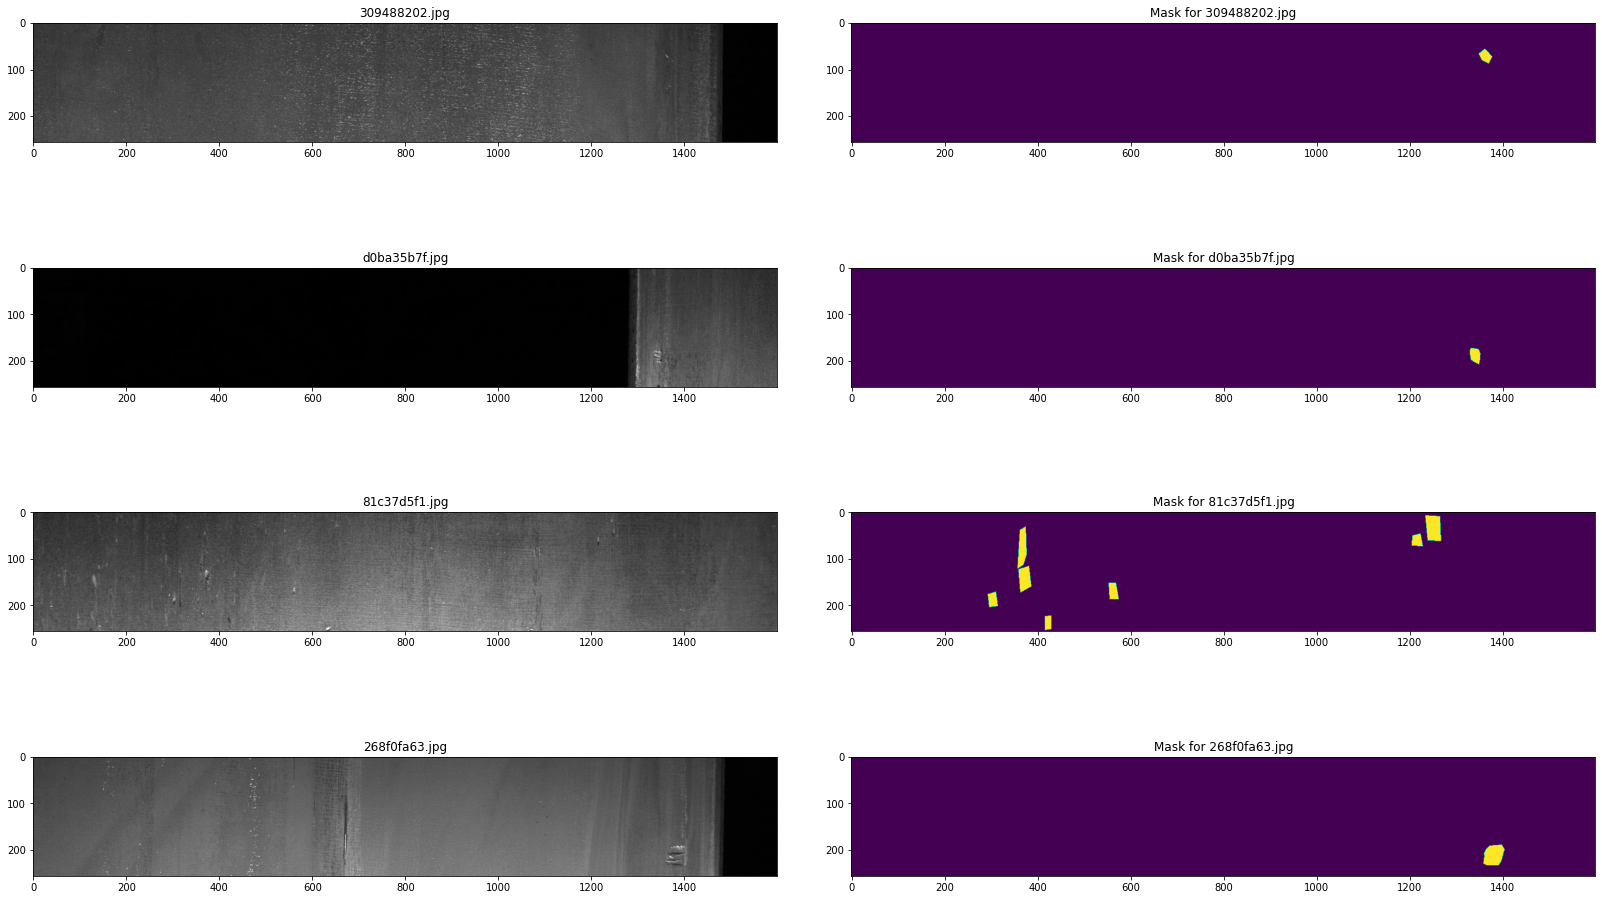

In [ ]:
rle_defect = train[train['defect_1'] == 1]
rle_defect = rle_defect[['image_id', 'rle_1']]
rle_defect = rle_defect.sample(n=4)
rle_defect = rle_defect.reset_index()
plot_mask(rle_defect, 1)

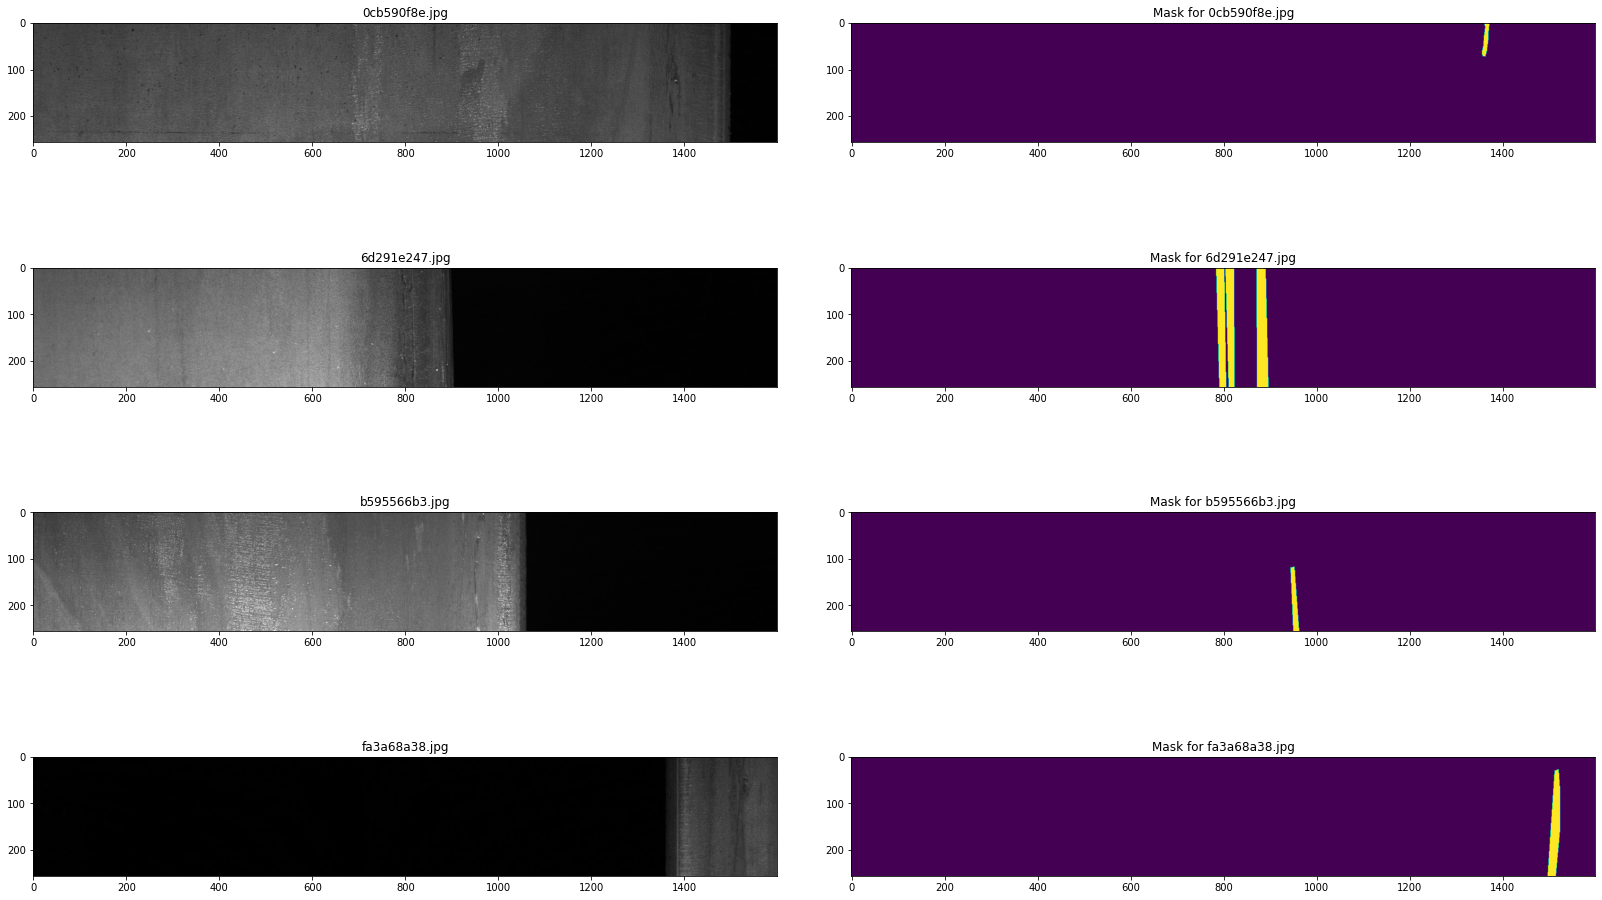

In [ ]:
rle_defect = train[train['defect_2'] == 1]
rle_defect = rle_defect[['image_id', 'rle_2']]
rle_defect = rle_defect.sample(n=4)
rle_defect = rle_defect.reset_index()
plot_mask(rle_defect, 2)


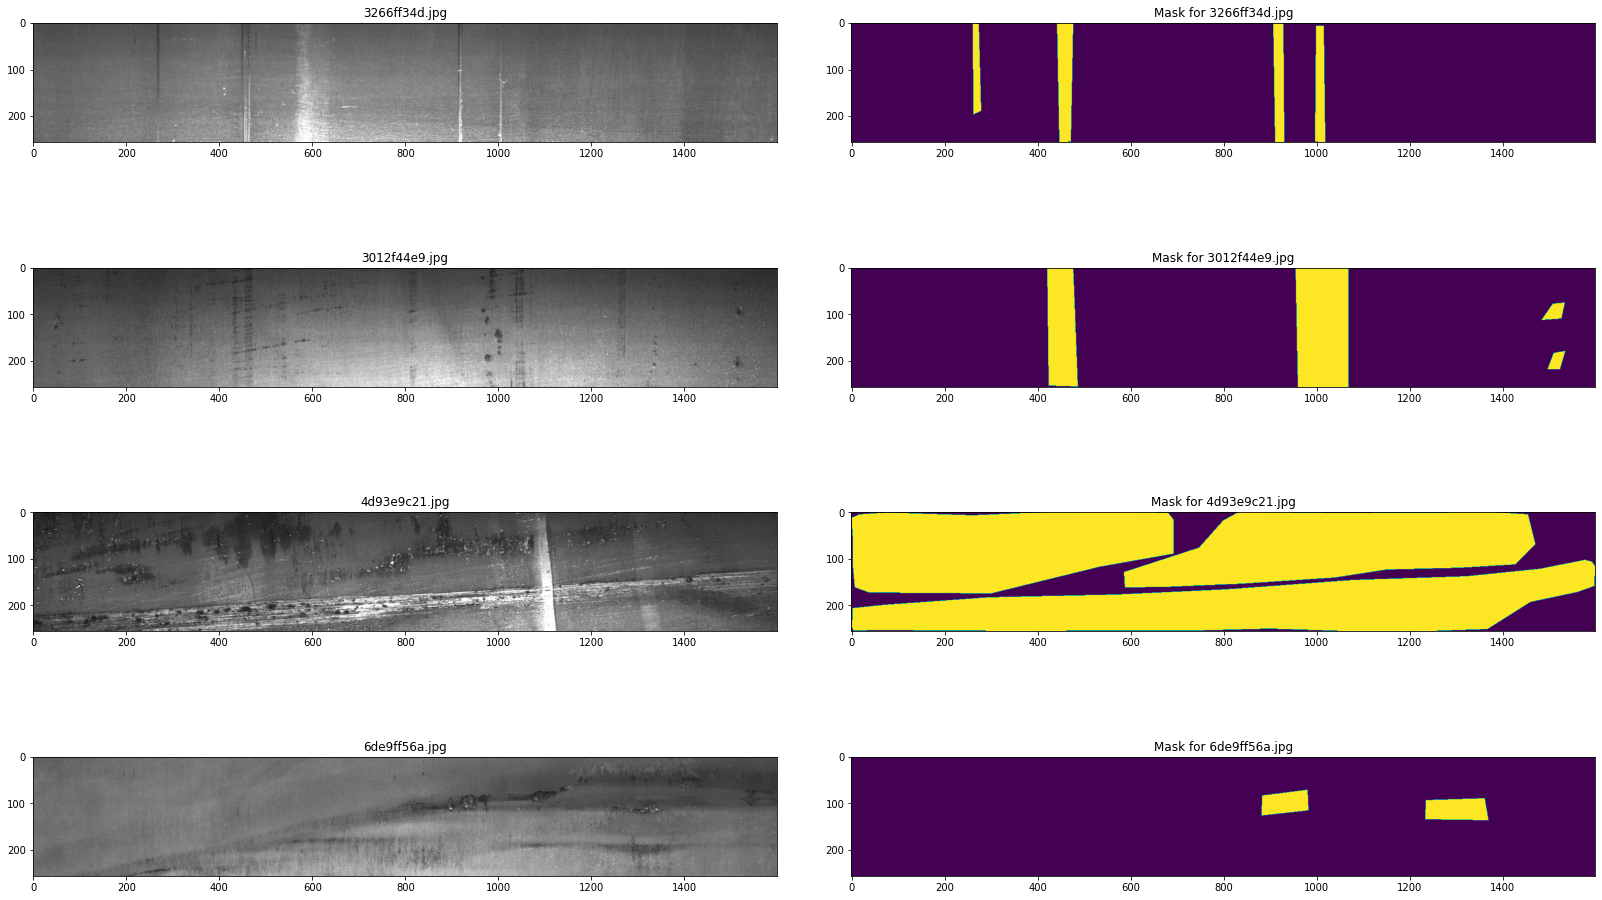

In [ ]:
rle_defect = train[train['defect_3'] == 1]
rle_defect = rle_defect[['image_id', 'rle_3']]
rle_defect = rle_defect.sample(n=4)
rle_defect = rle_defect.reset_index()
plot_mask(rle_defect, 3)

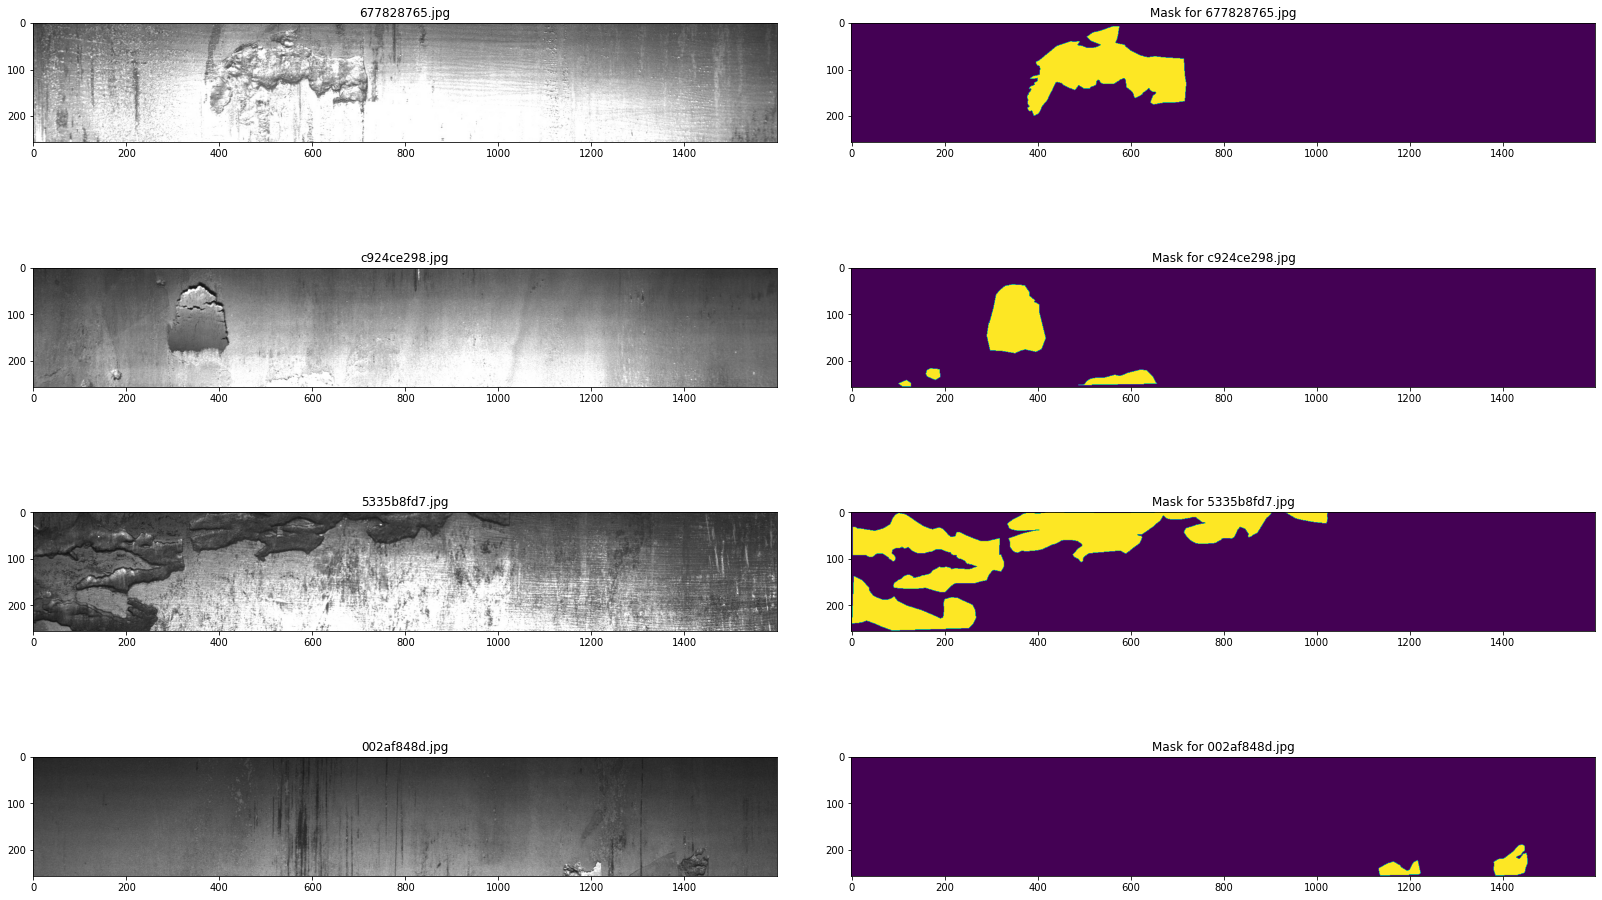

In [ ]:
rle_defect = train[train['defect_4'] == 1]
rle_defect = rle_defect[['image_id', 'rle_4']]
rle_defect = rle_defect.sample(n=4)
rle_defect = rle_defect.reset_index()
plot_mask(rle_defect, 4)

In [ ]:
def mask_areas(rle_defect):
    area = []
    for i in rle_defect:
        mask = np.sum(rle_to_mask(i))
        area.append(np.sum(rle_to_mask(i)))
    return area

In [ ]:
rle_defect = train[train['defect_1'] == 1]
rle_defect = rle_defect['rle_1']
rle_1_area = mask_areas(rle_defect)

rle_defect = train[train['defect_2'] == 1]
rle_defect = rle_defect['rle_2']
rle_2_area = mask_areas(rle_defect)

rle_defect = train[train['defect_3'] == 1]
rle_defect = rle_defect['rle_3']
rle_3_area = mask_areas(rle_defect)

rle_defect = train[train['defect_4'] == 1]
rle_defect = rle_defect['rle_4']
rle_4_area = mask_areas(rle_defect)


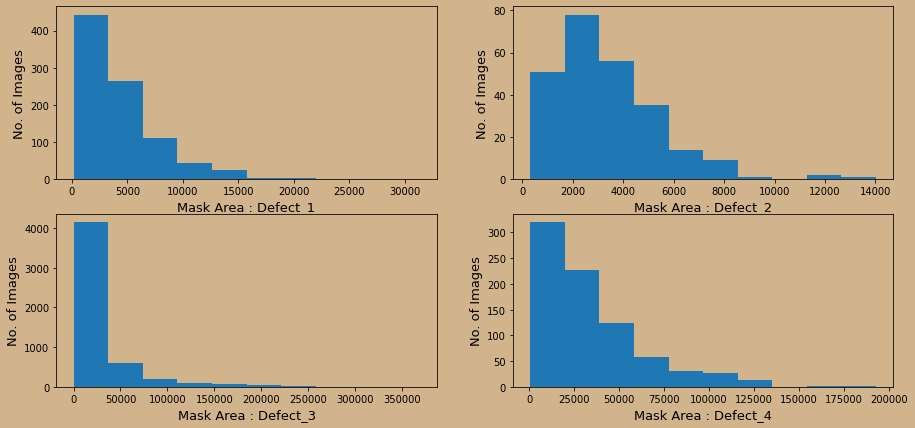

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

ax[0, 0].hist(x=rle_1_area)
ax[0, 0].set_xlabel("Mask Area : Defect_1", fontsize=13)
ax[0, 0].set_ylabel("No. of Images", fontsize=13)
ax[0, 0].set_facecolor("tan")

ax[0, 1].hist(x=rle_2_area)
ax[0, 1].set_xlabel("Mask Area : Defect_2", fontsize=13)
ax[0, 1].set_ylabel("No. of Images", fontsize=13)
ax[0, 1].set_facecolor("tan")

ax[1, 0].hist(x=rle_3_area)
ax[1, 0].set_xlabel("Mask Area : Defect_3", fontsize=13)
ax[1, 0].set_ylabel("No. of Images", fontsize=13)
ax[1, 0].set_facecolor("tan")

ax[1, 1].hist(x=rle_4_area)
ax[1, 1].set_xlabel("Mask Area : Defect_4", fontsize=13)
ax[1, 1].set_ylabel("No. of Images", fontsize=13)
ax[1, 1].set_facecolor("tan")

fig.set_facecolor("tan")
plt.show()

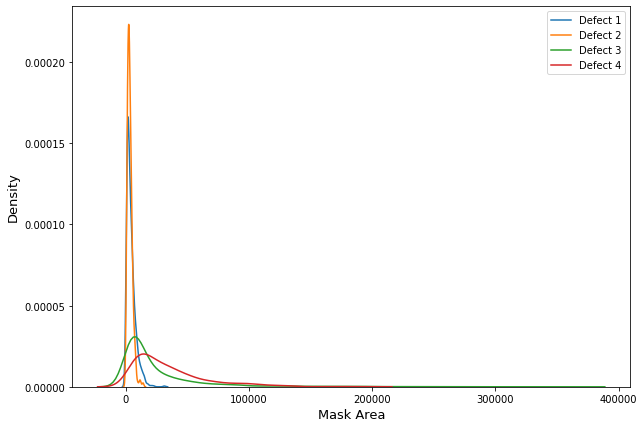

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(rle_1_area, label='Defect 1')
sns.kdeplot(rle_2_area, label='Defect 2')
sns.kdeplot(rle_3_area, label='Defect 3')
sns.kdeplot(rle_4_area, label='Defect 4')
plt.legend()
# ax.set_facecolor("tan")
# fig.set_facecolor("tan")
plt.ylabel('Density', fontsize=13)
plt.xlabel('Mask Area', fontsize=13)
plt.show()


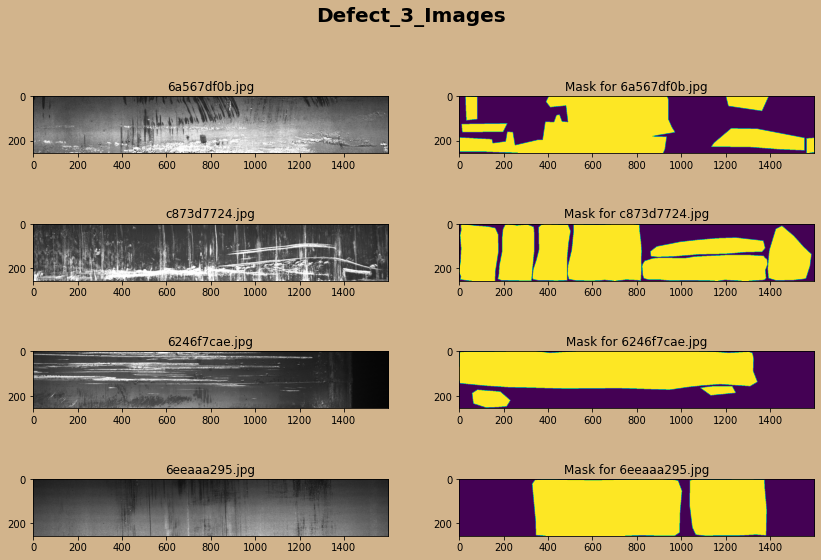

In [ ]:
rle_defect = train[train['defect_3'] == 1]
rle = rle_defect['rle_3']
rle_3_area = mask_areas(rle)
rle_defect['rle_3_area'] = rle_3_area
rle_defect = rle_defect[rle_defect['rle_3_area'] > 200000]
rle_defect = rle_defect[['image_id', 'rle_3']]
rle_defect = rle_defect.sample(n=4)
rle_defect = rle_defect.reset_index()
plot_mask(rle_defect, 3)